In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_classification import mixtured_2d_2cls, plot_scatter
import matplotlib.pyplot as plt

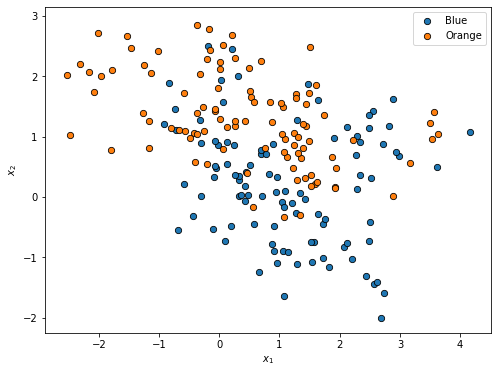

In [18]:
X_train, X_test, y_train, y_test = mixtured_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train)
plt.show()

## 分类树

In [2]:
from pylib.utils.functions_for_classification import plot_decision_boundary
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import numpy as np

In [5]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [6]:
train_err = 1 - tree.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.000


In [7]:
test_err = 1 - tree.score(X_test, y_test)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.240


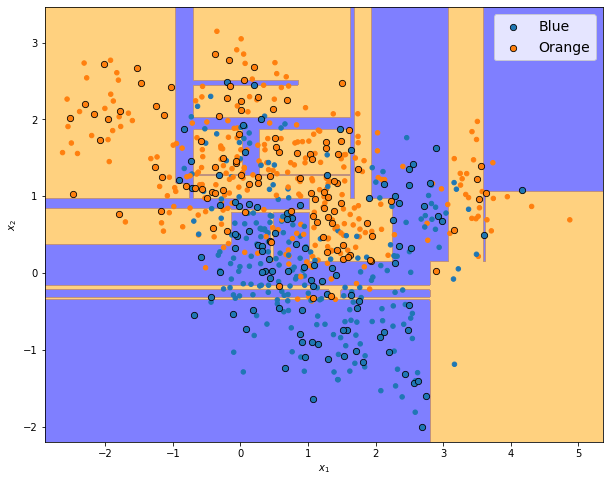

In [8]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, tree)
plt.show()

### 寻找最优参数

In [9]:
from sklearn.model_selection import GridSearchCV
import ipyvolume.pylab as plt3d
import numpy as np

In [10]:
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [None, 3, 5, 7, 9, 20],
              'min_samples_leaf': np.arange(1, 40)}
tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                       param_grid=param_grid,
                       cv=10,
                       n_jobs=-1)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 9, 20],
                  

In [11]:
tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4}

### 使用最优参数模型

In [12]:
tree_best = tree_cv.best_estimator_

In [13]:
train_err = 1 - tree_best.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.130


In [14]:
test_err = 1 - tree_best.score(X_test, y_test)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.216


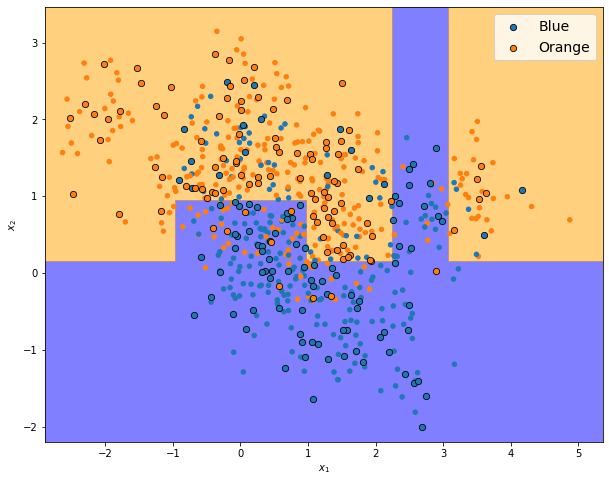

In [15]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, tree_best)
plt.show()

In [16]:
# 3d概率表面
n = 100
X = np.r_[X_train, X_test]
x1n, x2n = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, n), \
           np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, n)
xx1n, xx2n = np.meshgrid(x1n, x2n)
XXn = np.c_[xx1n.ravel(), xx2n.ravel()]
yyn_proba = tree_best.predict_proba(XXn)
yyn_proba = yyn_proba[:, 1].reshape(xx1n.shape)

plt3d.figure(width=1000, height=500)
plt3d.plot_surface(xx1n, yyn_proba, xx2n, color="green")
plt3d.xlabel("x1")
plt3d.zlabel("x2")
plt3d.ylabel("P")
plt3d.show()

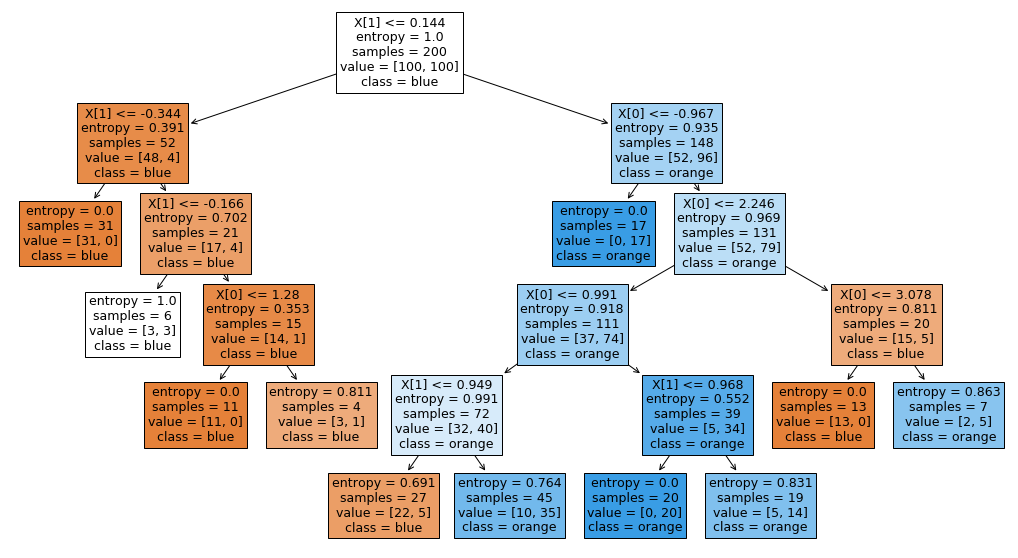

In [17]:
# 查看最优树的结构
fig, ax = plt.subplots(figsize=(18, 10))
plot_tree(tree_best, filled=True, ax=ax, class_names=["blue", "orange"])
plt.show()